In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
pd.DataFrame({"AAPL": [100, 200]})

,AAPL
0,100
1,200


In [3]:
pd.DataFrame({"AAPL": [100, 200]}).melt()

,variable,value
0,AAPL,100
1,AAPL,200


In [4]:
pd.DataFrame({"AAPL": [100, 200], "MSFT": [300, 400], "TLSA": [500, 600]})

,AAPL,MSFT,TLSA
0,100,300,500
1,200,400,600


In [5]:
pd.DataFrame({"AAPL": [100, 200], "MSFT": [300, 400], "TLSA": [500, 600]}).melt()

,variable,value
0,AAPL,100
1,AAPL,200
2,MSFT,300
3,MSFT,400
4,TLSA,500
5,TLSA,600


In [6]:
pd.DataFrame({"AAPL": [100, 200], "MSFT": [300, 400], "TLSA": [500, 600]}).melt(var_name="Ticker", value_name="Price")

,Ticker,Price
0,AAPL,100
1,AAPL,200
2,MSFT,300
3,MSFT,400
4,TLSA,500
5,TLSA,600


In [7]:
pd.DataFrame({
    "Tickers": ["AAPL", "BTC", "MSFT", "META"],
    "Price": [234, 433, 553, 223],
    "Year": [2024, 2024, 2024, 2024],
    "Close": [235, 442, 551, 230]
})

,Tickers,Price,Year,Close
0,AAPL,234,2024,235
1,BTC,433,2024,442
2,MSFT,553,2024,551
3,META,223,2024,230


In [8]:
pd.DataFrame({
    "Tickers": ["AAPL", "BTC", "MSFT", "META"],
    "Price": [234, 433, 553, 223],
    "Year": [2024, 2024, 2024, 2024],
    "Close": [235, 442, 551, 230]
}).melt()

,variable,value
0,Tickers,AAPL
1,Tickers,BTC
2,Tickers,MSFT
3,Tickers,META
4,Price,234
5,Price,433
6,Price,553
7,Price,223
8,Year,2024
9,Year,2024


In [9]:
pd.DataFrame({
    "Tickers": ["AAPL", "BTC", "MSFT", "META"],
    "Price": [234, 433, 553, 223],
    "Year": [2024, 2024, 2024, 2024],
    "Close": [235, 442, 551, 230]
}).melt(id_vars=["Tickers"])

,Tickers,variable,value
0,AAPL,Price,234
1,BTC,Price,433
2,MSFT,Price,553
3,META,Price,223
4,AAPL,Year,2024
5,BTC,Year,2024
6,MSFT,Year,2024
7,META,Year,2024
8,AAPL,Close,235
9,BTC,Close,442


In [10]:
pd.DataFrame({
    "Tickers": ["AAPL", "BTC", "MSFT", "META"],
    "Price": [234, 433, 553, 223],
    "Year": [2024, 2024, 2024, 2024],
    "Close": [235, 442, 551, 230]
}).melt(id_vars=["Tickers"], var_name="Price", value_name="Value")

,Tickers,Price,Value
0,AAPL,Price,234
1,BTC,Price,433
2,MSFT,Price,553
3,META,Price,223
4,AAPL,Year,2024
5,BTC,Year,2024
6,MSFT,Year,2024
7,META,Year,2024
8,AAPL,Close,235
9,BTC,Close,442


In [11]:
tickers = ["AAPL", "AMZN", "MSFT", "META"]
data = yf.download(tickers=tickers, start="2024-01-01", end="2024-06-30", group_by="Ticker")
data.head()

C:\Users\emmanuel.osademe\AppData\Local\Temp\ipykernel_5052\819221589.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=tickers, start="2024-01-01", end="2024-06-30", group_by="Ticker")
[*********************100%***********************]  4 of 4 completed


Ticker            META                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  349.403128  351.233085  338.154840  344.400574  19042200   
2024-01-03  343.097742  346.051539  341.307545  342.590515  15451100   
2024-01-04  342.620374  346.250453  341.526370  345.226074  12099900   
2024-01-05  345.096765  351.571255  344.370767  350.029724  13920700   
2024-01-08  352.764740  357.021386  350.129174  356.703125  13890200   

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  369.663798  371.680909  362.653379  366.707367  25258600   
2024-01-03  364.868310  369.070608  364.373922  366.440460  23083500   
2024-01-04  366.509642  368.912360  363.048926  363.810272  20901500   
2024-01-05  364.828745  367.884059  362.386466  363.622437  21004600   
2024-01-08  365.155010  370.988813  364.868286  370.484528  23134000   

Ticker            AMZN                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  151.539993  152.380005  148.389999  149.929993  47339400   
2024-01-03  149.199997  151.050003  148.330002  148.470001  49425500   
2024-01-04  145.589996  147.380005  144.050003  144.570007  56039800   
2024-01-05  144.690002  146.589996  144.529999  145.240005  45153100   
2024-01-08  146.740005  149.399994  146.149994  149.100006  46757100   

Ticker            AAPL                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2024-01-02  185.789438  187.070068  182.553143  184.290421  82488700  
2024-01-03  182.880757  184.528693  182.096492  182.910538  58414500  
2024-01-04  180.825800  181.758969  179.565044  180.587555  71983600  
2024-01-05  180.666948  181.431339  178.860172  179.862823  62379700  
2024-01-08  180.766239  184.250731  180.180532  184.211014  59144500

In [12]:
data = data.stack(level=0, future_stack=True).reset_index(level=1)
data

Price,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-01-02,META,349.403128,351.233085,338.154840,344.400574,19042200
2024-01-02,MSFT,369.663798,371.680909,362.653379,366.707367,25258600
2024-01-02,AMZN,151.539993,152.380005,148.389999,149.929993,47339400
2024-01-02,AAPL,185.789438,187.070068,182.553143,184.290421,82488700
2024-01-03,META,343.097742,346.051539,341.307545,342.590515,15451100
...,...,...,...,...,...,...
2024-06-27,AAPL,213.690644,214.735759,211.361540,213.103394,49772700
2024-06-28,META,515.385290,520.099130,502.120682,502.499390,15855100
2024-06-28,MSFT,449.622746,451.915168,443.013417,443.549316,28362300


In [13]:
df = data.reset_index().melt(id_vars=["Date","Ticker"], var_name="Metric", value_name="Value", value_vars=["Open", "High", "Low", "Close", "Volume"])

In [14]:
df

,Date,Ticker,Metric,Value
0,2024-01-02,META,Open,3.494031e+02
1,2024-01-02,MSFT,Open,3.696638e+02
2,2024-01-02,AMZN,Open,1.515400e+02
3,2024-01-02,AAPL,Open,1.857894e+02
4,2024-01-03,META,Open,3.430977e+02
...,...,...,...,...
2475,2024-06-27,AAPL,Volume,4.977270e+07
2476,2024-06-28,META,Volume,1.585510e+07
2477,2024-06-28,MSFT,Volume,2.836230e+07
2478,2024-06-28,AMZN,Volume,7.693020e+07


In [15]:
# Pivot table

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2024-01-02 to 2024-06-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  496 non-null    object 
 1   Open    496 non-null    float64
 2   High    496 non-null    float64
 3   Low     496 non-null    float64
 4   Close   496 non-null    float64
 5   Volume  496 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.1+ KB


In [16]:
data.groupby(['Ticker', 'Date'])["Open"].mean().unstack()

Date,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-16,...,2024-06-14,2024-06-17,2024-06-18,2024-06-20,2024-06-21,2024-06-24,2024-06-25,2024-06-26,2024-06-27,2024-06-28
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,185.789438,182.880757,180.825800,180.666948,180.766239,182.582920,183.009821,185.183874,184.707356,180.835714,...,212.854540,212.376781,216.577138,212.934166,209.410649,206.753084,208.176431,210.515486,213.690644,214.765608
AMZN,151.539993,149.199997,145.589996,144.690002,146.740005,148.330002,152.059998,155.039993,155.389999,153.529999,...,183.080002,182.520004,183.740005,182.910004,187.800003,189.330002,186.809998,186.919998,195.009995,197.729996
META,349.403128,343.097742,342.620374,345.096765,352.764740,354.455418,358.204850,370.099584,368.140385,371.611307,...,500.934749,499.958118,502.838229,500.287001,501.732042,497.496538,495.353855,504.921126,512.495171,515.385290
MSFT,369.663798,364.868310,366.509642,364.828745,365.155010,367.834602,372.145655,381.667546,381.163269,389.241583,...,434.945300,439.222506,446.288324,442.904248,443.976055,446.377623,444.839422,445.583705,448.739534,449.622746


In [17]:
data.pivot_table(index="Ticker", columns="Date", values=["Open"])

Price         Open                                                  \
Date    2024-01-02  2024-01-03  2024-01-04  2024-01-05  2024-01-08   
Ticker                                                               
AAPL    185.789438  182.880757  180.825800  180.666948  180.766239   
AMZN    151.539993  149.199997  145.589996  144.690002  146.740005   
META    349.403128  343.097742  342.620374  345.096765  352.764740   
MSFT    369.663798  364.868310  366.509642  364.828745  365.155010   

Price                                                               ...  \
Date    2024-01-09  2024-01-10  2024-01-11  2024-01-12  2024-01-16  ...   
Ticker                                                              ...   
AAPL    182.582920  183.009821  185.183874  184.707356  180.835714  ...   
AMZN    148.330002  152.059998  155.039993  155.389999  153.529999  ...   
META    354.455418  358.204850  370.099584  368.140385  371.611307  ...   
MSFT    367.834602  372.145655  381.667546  381.163269  389.241583  ...   

Price                                                               \
Date    2024-06-14  2024-06-17  2024-06-18  2024-06-20  2024-06-21   
Ticker                                                               
AAPL    212.854540  212.376781  216.577138  212.934166  209.410649   
AMZN    183.080002  182.520004  183.740005  182.910004  187.800003   
META    500.934749  499.958118  502.838229  500.287001  501.732042   
MSFT    434.945300  439.222506  446.288324  442.904248  443.976055   

Price                                                               
Date    2024-06-24  2024-06-25  2024-06-26  2024-06-27  2024-06-28  
Ticker                                                              
AAPL    206.753084  208.176431  210.515486  213.690644  214.765608  
AMZN    189.330002  186.809998  186.919998  195.009995  197.729996  
META    497.496538  495.353855  504.921126  512.495171  515.385290  
MSFT    446.377623  444.839422  445.583705  448.739534  449.622746  

[4 rows x 124 columns]

In [18]:
data.pivot_table(index="Ticker", columns="Date", values=["Open"], aggfunc="mean")

Price         Open                                                  \
Date    2024-01-02  2024-01-03  2024-01-04  2024-01-05  2024-01-08   
Ticker                                                               
AAPL    185.789438  182.880757  180.825800  180.666948  180.766239   
AMZN    151.539993  149.199997  145.589996  144.690002  146.740005   
META    349.403128  343.097742  342.620374  345.096765  352.764740   
MSFT    369.663798  364.868310  366.509642  364.828745  365.155010   

Price                                                               ...  \
Date    2024-01-09  2024-01-10  2024-01-11  2024-01-12  2024-01-16  ...   
Ticker                                                              ...   
AAPL    182.582920  183.009821  185.183874  184.707356  180.835714  ...   
AMZN    148.330002  152.059998  155.039993  155.389999  153.529999  ...   
META    354.455418  358.204850  370.099584  368.140385  371.611307  ...   
MSFT    367.834602  372.145655  381.667546  381.163269  389.241583  ...   

Price                                                               \
Date    2024-06-14  2024-06-17  2024-06-18  2024-06-20  2024-06-21   
Ticker                                                               
AAPL    212.854540  212.376781  216.577138  212.934166  209.410649   
AMZN    183.080002  182.520004  183.740005  182.910004  187.800003   
META    500.934749  499.958118  502.838229  500.287001  501.732042   
MSFT    434.945300  439.222506  446.288324  442.904248  443.976055   

Price                                                               
Date    2024-06-24  2024-06-25  2024-06-26  2024-06-27  2024-06-28  
Ticker                                                              
AAPL    206.753084  208.176431  210.515486  213.690644  214.765608  
AMZN    189.330002  186.809998  186.919998  195.009995  197.729996  
META    497.496538  495.353855  504.921126  512.495171  515.385290  
MSFT    446.377623  444.839422  445.583705  448.739534  449.622746  

[4 rows x 124 columns]

In [19]:
data.pivot_table(index="Ticker", columns="Date", values=["Open", "Close"], aggfunc="mean")

Price        Close                                                  \
Date    2024-01-02  2024-01-03  2024-01-04  2024-01-05  2024-01-08   
Ticker                                                               
AAPL    184.290421  182.910538  180.587555  179.862823  184.211014   
AMZN    149.929993  148.470001  144.570007  145.240005  149.100006   
META    344.400574  342.590515  345.226074  350.029724  356.703125   
MSFT    366.707367  366.440460  363.810272  363.622437  370.484528   

Price                                                               ...  \
Date    2024-01-09  2024-01-10  2024-01-11  2024-01-12  2024-01-16  ...   
Ticker                                                              ...   
AAPL    183.794052  184.836441  184.240784  184.568375  182.295029  ...   
AMZN    151.369995  153.729996  155.179993  154.619995  153.160004  ...   
META    355.479797  368.448639  367.653015  372.446747  365.455078  ...   
MSFT    371.572174  378.473816  380.312927  384.109833  385.889618  ...   

Price         Open                                                  \
Date    2024-06-14  2024-06-17  2024-06-18  2024-06-20  2024-06-21   
Ticker                                                               
AAPL    212.854540  212.376781  216.577138  212.934166  209.410649   
AMZN    183.080002  182.520004  183.740005  182.910004  187.800003   
META    500.934749  499.958118  502.838229  500.287001  501.732042   
MSFT    434.945300  439.222506  446.288324  442.904248  443.976055   

Price                                                               
Date    2024-06-24  2024-06-25  2024-06-26  2024-06-27  2024-06-28  
Ticker                                                              
AAPL    206.753084  208.176431  210.515486  213.690644  214.765608  
AMZN    189.330002  186.809998  186.919998  195.009995  197.729996  
META    497.496538  495.353855  504.921126  512.495171  515.385290  
MSFT    446.377623  444.839422  445.583705  448.739534  449.622746  

[4 rows x 248 columns]

In [20]:
data.pivot_table(index="Ticker", columns="Date", aggfunc={"Open": "mean", "High": "max", "Volume": "sum"})

Price         High                                                  \
Date    2024-01-02  2024-01-03  2024-01-04  2024-01-05  2024-01-08   
Ticker                                                               
AAPL    187.070068  184.528693  181.758969  181.431339  184.250731   
AMZN    152.380005  151.050003  147.380005  146.589996  149.399994   
META    351.233085  346.051539  346.250453  351.571255  357.021386   
MSFT    371.680909  369.070608  368.912360  367.884059  370.988813   

Price                                                               ...  \
Date    2024-01-09  2024-01-10  2024-01-11  2024-01-12  2024-01-16  ...   
Ticker                                                              ...   
AAPL    183.803974  185.044906  185.690176  185.382421  182.920438  ...   
AMZN    151.710007  154.419998  157.169998  156.199997  154.990005  ...   
META    358.672305  370.905163  370.746032  375.002732  373.560605  ...   
MSFT    371.769911  379.858127  386.295010  384.317467  389.607426  ...   

Price      Volume                                                         \
Date   2024-06-14 2024-06-17 2024-06-18 2024-06-20 2024-06-21 2024-06-24   
Ticker                                                                     
AAPL     70122700   93728300   79943300   86172500  241805100   80727000   
AMZN     25456400   35601900   36659200   44726800   70792500   50610400   
META     10243300   11266600   13060400   11801200   22359200   13525300   
MSFT     13582000   20790000   17112500   19877400   34187100   15913700   

Price                                               
Date   2024-06-25 2024-06-26 2024-06-27 2024-06-28  
Ticker                                              
AAPL     55549700   66213200   49772700   82542700  
AMZN     45366400   65103900   74397500   76930200  
META     12063200    8882300   10121200   15855100  
MSFT     16413400   16507000   14806300   28362300  

[4 rows x 372 columns]

In [21]:
data.pivot_table(index=["Ticker", "Date"], aggfunc={"Open": "mean", "High": "max", "Volume": "sum"})

Price                    High        Open    Volume
Ticker Date                                        
AAPL   2024-01-02  187.070068  185.789438  82488700
       2024-01-03  184.528693  182.880757  58414500
       2024-01-04  181.758969  180.825800  71983600
       2024-01-05  181.431339  180.666948  62379700
       2024-01-08  184.250731  180.766239  59144500
...                       ...         ...       ...
MSFT   2024-06-24  449.305190  446.377623  15913700
       2024-06-25  447.985316  444.839422  16413400
       2024-06-26  450.148711  445.583705  16507000
       2024-06-27  452.699196  448.739534  14806300
       2024-06-28  451.915168  449.622746  28362300

[496 rows x 3 columns]

In [22]:
data.pivot_table(index="Ticker", columns="Volume", aggfunc="sum", margins=True)

Price        Close                                                  \
Volume     7088700     8120600     8380600     8882300     9226200   
Ticker                                                               
AAPL           NaN         NaN         NaN         NaN         NaN   
AMZN           NaN         NaN         NaN         NaN         NaN   
META    474.890808  507.337341  500.806213  511.369049  472.272369   
MSFT           NaN         NaN         NaN         NaN         NaN   
All     474.890808  507.337341  500.806213  511.369049  472.272369   

Price                                                               ...  \
Volume     9247000     9380700     9437700     9673700     9712500  ...   
Ticker                                                              ...   
AAPL           NaN         NaN         NaN         NaN         NaN  ...   
AMZN           NaN         NaN         NaN         NaN         NaN  ...   
META    489.187592  490.790527  473.327698  505.236664  505.525391  ...   
MSFT           NaN         NaN         NaN         NaN         NaN  ...   
All     489.187592  490.790527  473.327698  505.236664  505.525391  ...   

Price         Open                                                             \
Volume   102551700   106181300   117218300   121752700  136682600   163224100   
Ticker                                                                          
AAPL    178.552442  175.987142         NaN  170.142433  180.18183  185.529519   
AMZN           NaN         NaN  169.190002         NaN        NaN         NaN   
META           NaN         NaN         NaN         NaN        NaN         NaN   
MSFT           NaN         NaN         NaN         NaN        NaN         NaN   
All     178.552442  175.987142  169.190002  170.142433  180.18183  185.529519   

Price                                                      
Volume   172373300   198134300   241805100            All  
Ticker                                                     
AAPL    192.748571  206.404722  209.410649   22702.238735  
AMZN           NaN         NaN         NaN   21742.010010  
META           NaN         NaN         NaN   57489.331515  
MSFT           NaN         NaN         NaN   50805.283447  
All     192.748571  206.404722  209.410649  152738.863707  

[5 rows x 1988 columns]

<Axes: xlabel='Ticker'>

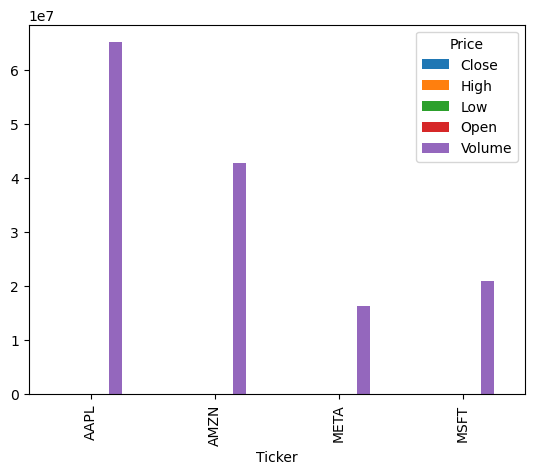

In [23]:
data.pivot_table(index="Ticker").plot(kind="bar")

<Axes: xlabel='Date'>

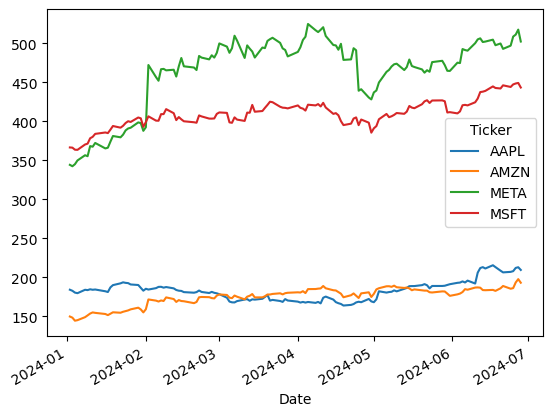

In [24]:
data.pivot_table(index="Date", columns="Ticker", values="Close").plot()